Integrated intensity

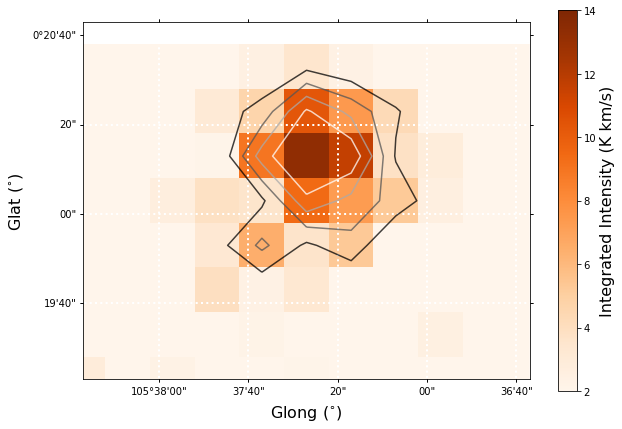

In [6]:
#HCN 

import numpy as np
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astropy.io import fits
from astropy.io import ascii
from spectral_cube import SpectralCube


filename = '/Users/jane/Desktop/s138_HCN_smooth_mom0.fits'
# load file, read data, wcs, and header
datfile = fits.open(filename)
dat = datfile[0].data
cube = SpectralCube.read(datfile)
wcs = WCS(datfile[0].header)

# extract the world coordinates of all the pixels using the world property, 
# which returns the spectral axis (which only has 1 value in a moment map/cube)
# then the two positional coordinates in reverse order 
# (in the same order as the data indices). 
Flux, lat, long  = cube.world[:] 

# z = ist position in array, y = 2nd position (starting at bottom), x = 3rd position (starting from left)
x = []
y = []
I = []
glat = []
glong = []

i = 0
j = 0
# scan through y-axis
for j in range(dat.shape[1]):
    # scan through x-axis 
    for i in range(dat.shape[2]):
        # set the value of the pixel
        zpix = dat[0,j,i]  # the flux value is found at pixel x, y 
        x.append(i)
        y.append(j)
        I.append(zpix)
        glat.append(lat[0,j,0])          # get the DEC/lat of pixel x/y from the world coordinates
        glong.append(long[0,0,i])   


ascii.write([x,y,glat,glong,I], 'test_output.txt', names=['X', 'Y', 'GLat', 'GLong', 'I'], overwrite=True)

  
fig = plt.figure(figsize=(10,7), facecolor='white')
ax = fig.add_subplot(111, projection=wcs[0, :,: ]) # to get RA and DEC, add WCS projection from header
im = ax.imshow(datfile[0].data[0, :, :], cmap='Oranges') # plot data
ax.set_xlabel("Glong ($^{\circ}$)", fontsize=16)
ax.set_ylabel("Glat ($^{\circ}$)", fontsize=16)
ax.set_xlim(0,10)
ax.set_ylim(39,47)
cbar = plt.colorbar(im)
cbar.set_label('Integrated Intensity (K km/s)', size=16)
im.set_clim(2,14) # set colorbar limits
ax.grid(color='white', ls='dotted', lw=2) # add grid lines
levels = (4,6,8,10) # to overplot contours, set the levels of the contours first
ax.contour(datfile[0].data[0, :, :], cmap = 'binary_r', alpha=0.75, levels=levels) # to overplot contours
# plt.savefig('filename’)

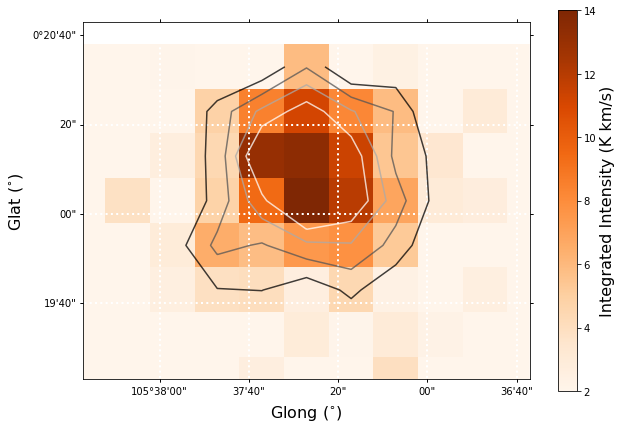

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astropy.io import fits
from astropy.io import ascii
from spectral_cube import SpectralCube


filename = '/Users/jane/Desktop/s138_HCO+_smooth_mom0.fits'
# load file, read data, wcs, and header
datfile = fits.open(filename)
dat = datfile[0].data
cube = SpectralCube.read(datfile)
wcs = WCS(datfile[0].header)

# extract the world coordinates of all the pixels using the world property, 
# which returns the spectral axis (which only has 1 value in a moment map/cube)
# then the two positional coordinates in reverse order 
# (in the same order as the data indices). 
Flux, lat, long  = cube.world[:] 

# z = ist position in array, y = 2nd position (starting at bottom), x = 3rd position (starting from left)
x = []
y = []
I = []
glat = []
glong = []

i = 0
j = 0
# scan through y-axis
for j in range(dat.shape[1]):
    # scan through x-axis 
    for i in range(dat.shape[2]):
        # set the value of the pixel
        zpix = dat[0,j,i]  # the flux value is found at pixel x, y 
        x.append(i)
        y.append(j)
        I.append(zpix)
        glat.append(lat[0,j,0])          # get the DEC/lat of pixel x/y from the world coordinates
        glong.append(long[0,0,i])   


ascii.write([x,y,glat,glong,I], 'test_output.txt', names=['X', 'Y', 'GLat', 'GLong', 'I'], overwrite=True)

  
fig = plt.figure(figsize=(10,7), facecolor='white')
ax = fig.add_subplot(111, projection=wcs[0, :,: ]) # to get RA and DEC, add WCS projection from header
im = ax.imshow(datfile[0].data[0, :, :], cmap='Oranges') # plot data
ax.set_xlabel("Glong ($^{\circ}$)", fontsize=16)
ax.set_ylabel("Glat ($^{\circ}$)", fontsize=16)
ax.set_xlim(0,10)
ax.set_ylim(39,47)
cbar = plt.colorbar(im)
cbar.set_label('Integrated Intensity (K km/s)', size=16)
im.set_clim(2,14) # set colorbar limits
ax.grid(color='white', ls='dotted', lw=2) # add grid lines
levels = (4,6,8,10) # to overplot contours, set the levels of the contours first
ax.contour(datfile[0].data[0, :, :], cmap = 'binary_r', alpha=0.75, levels=levels) # to overplot contours
# plt.savefig('filename’)